### Importing Dependencies

In [1]:
#uv add pandas numpy matplotlib seaborn pyarrow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dotenv import load_dotenv
import os
from IPython.display import display
import re

### Assigning Constants

In [3]:
load_dotenv()
URL = os.getenv("URL")

### Downloading the file

In [4]:
def download_file(url):
     response = requests.get(url)
     if "content-disposition" in response.headers:
         content_disposition = response.headers["content-disposition"]
         filename = content_disposition.split("filename=")[1]
     else:
         filename = url.split("/")[-1]
     with open(filename, mode="wb") as file:
         file.write(response.content)
     print(f"Downloaded file {filename}")

In [5]:
# download_file(URL)

### Unzipping the downloaded file

In [6]:
import gzip

def gunzip(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        while True:
            block = s_file.read(block_size)
            if not block:
                break
            else:
                d_file.write(block)

# gunzip("Tyroo-dummy-data.csv.gz","Tyroo-dummy-data.csv")

Optimizing the read speeds

In [7]:
df = pd.read_csv("Tyroo-dummy-data.csv", engine='pyarrow')

In [17]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
0,0.07,Parts & Spares,https://my-live.slatic.net/p/98b201dcb23a6f15c...,lazada://my/d?uri=https://www.lazada.com.my/pr...,in stock,None,20,0,16.74,Automotive,17.00,https://my-live.slatic.net/p/98b201dcb23a6f15c...,Motors,Perodua,None,None,https://www.lazada.com.my/shop/z-one-accessori...,0.07,Myvi Viva side bumper clip/Air Panel/wiper pan...,14676226228,99.0,0.0,Lazada,Marketplace,https://my-live.slatic.net/p/c14fc6fdbb240010a...,0.0,Z ONE ACCESSORIES WAREHOUSE SDN BHD,https://www.lazada.com.my/products/myvi-viva-s...,1352896491,Clips,5.0,https://my-live.slatic.net/p/98b201dcb23a6f15c...,None,17.00
1,0.1,Hair Care,https://my-live.slatic.net/p/90097ebc33ddd0641...,lazada://my/d?uri=https://www.lazada.com.my/pr...,in stock,https://my-live.slatic.net/p/90ffe96b5f53d38cf...,115,0,39.9,Personal Care,39.90,https://my-live.slatic.net/p/90097ebc33ddd0641...,Beauty,No Brand,https://my-live.slatic.net/p/4be2f46fee5858ca9...,KEY BENEFITSï¼Repairs damaged and compromised...,https://www.lazada.com.my/shop/olaplex-haircar...,0.22,（Buy one get one）Olaplex No.7 Bonding Oil 30ml...,22263928224,96.0,0.12,Lazada,Marketplace,https://my-live.slatic.net/p/8f699d3a2f66b0e45...,73.4,OLAPLEX HAIRCARE Store,https://www.lazada.com.my/products/buy-one-get...,3856537822,Hair Treatments,4.930434782608696,https://my-live.slatic.net/p/90097ebc33ddd0641...,https://my-live.slatic.net/p/140edb5b3b8d13009...,150.00
2,0.07,Electronics,https://my-live.slatic.net/p/35c1806bcb2b6895f...,lazada://my/d?uri=https://www.lazada.com.my/pr...,in stock,https://my-live.slatic.net/p/bd0e9b3b7a0120bdf...,185,0,609.0,Automotive,619.00,https://my-live.slatic.net/p/35c1806bcb2b6895f...,Motors,70mai,https://my-live.slatic.net/p/aefad376b4d670f33...,None,https://www.lazada.com.my/shop/70mai,0.11000000000000001,70mai S500 Rearview Dashcam Wide with Night Vi...,4335984780,99.0,0.04,LazMall,Marketplace,https://my-live.slatic.net/p/76442e587a6b97ecf...,15.09,70mai,https://www.lazada.com.my/products/70mai-s500-...,1353246653,On-Dash Video,4.951351351351351,https://my-live.slatic.net/p/35c1806bcb2b6895f...,https://my-live.slatic.net/p/b397560f5f47697dd...,729.00
3,0.07,Disposable Napkins,https://my-live.slatic.net/p/06e24c1ead0e47cb3...,lazada://my/d?uri=https://www.lazada.com.my/pr...,in stock,https://my-live.slatic.net/p/3b635d52337db761f...,33496,0,0.0,Disposables,1.06,https://my-live.slatic.net/p/06e24c1ead0e47cb3...,Kitchen & Dining,No Brand,https://my-live.slatic.net/p/b8432e0ce5b55933e...,"Size:50pcs/Roll, The patterns are randomized.T...",https://www.lazada.com.my/shop/oiga,0.12000000000000001,tissues paper Disposable Cleaning Cloths Wipe ...,21472602354,98.0,0.05,LazGlobal,Crossborder,https://my-live.slatic.net/p/67e9321adc531ab01...,74.94,OIGA,https://www.lazada.com.my/products/tissues-pap...,3772733731,Disposable Napkins,4.94632194888942,https://my-live.slatic.net/p/06e24c1ead0e47cb3...,https://my-live.slatic.net/p/c03b8685d5e09ed9c...,4.23
4,0.1,Serum & Essence,https://my-live.slatic.net/p/e17a59e38fc2418f8...,lazada://my/d?uri=https://www.lazada.com.my/pr...,in stock,https://my-live.slatic.net/p/0c7fe68f5a8a9826d...,20378,0,1.2,Skin Care,1.20,https://my-live.slatic.net/p/e17a59e38fc2418f8...,Beauty,No Brand,https://my-live.slatic.net/p/17c4711cec6168958...,None,https://www.lazada.com.my/shop/youbuy-official,0.15000000000000002,Natural aloe vera gel 300g containing plant es...,21755692333,98.0,0.05,LazGlobal,Crossborder,https://my-live.slatic.ne

### Preliminary Analysis

In [10]:
df.shape

(1000003, 34)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000003 entries, 0 to 1000002
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   platform_commission_rate     1000003 non-null  object
 1   venture_category3_name_en    969545 non-null   object
 2   product_small_img            1000003 non-null  object
 3   deeplink                     1000003 non-null  object
 4   availability                 1000003 non-null  object
 5   image_url_5                  823063 non-null   object
 6   number_of_reviews            929893 non-null   object
 7   is_free_shipping             1000003 non-null  object
 8   promotion_price              1000003 non-null  object
 9   venture_category2_name_en    999993 non-null   object
 10  current_price                1000003 non-null  object
 11  product_medium_img           1000003 non-null  object
 12  venture_category1_name_en    1000003 non-null  object
 1

We can see all columns are of Object type.



In [12]:
df.describe(include="all")

,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
count,1000003,969545,1000003,1000003,1000003,823063,929893,1000003,1000003,999993,1000003,1000003,1000003,998242,881633,590777,1000003,1000003,1000003,1000003,998277,1000003,1000003,1000003,961169,1000003,1000003,1000003,1000003,1000003,929407,1000003,938606,1000003
unique,7,1266,879077,1000001,2,541001,4259,2,30299,250,33248,879077,41,16586,589277,375049,48955,185,700570,1000001,57,102,4,4,661124,9731,48955,1000001,721266,3021,31773,879076,636076,33266
top,0.07,Tops,https://filebroker-cdn.lazada.com.my/kf/S26e3a...,deeplink,in stock,https://my-live.slatic.net/p/1d953beb684d304a1...,1,0,0.0,Women Clothing,9.90,https://filebroker-cdn.lazada.com.my/kf/S26e3a...,Women's Shoes and Clothing,No Brand,https://my-live.slatic.net/p/1fba848460dabb416...,&nbsp;,https://www.lazada.com.my/shop/tao-women-s-fas...,0.11000000000000001,Cold and Relaxed Feeling Wear Water Soluble La...,sku_id,98.0,0.04,Lazada,Marketplace,https://my-live.slatic.net/p/e9ea4ca2dcc8c1ebd...,0.0,TAO Women's Fashion Collections,product_url,2414367349,Dresses,5.0,https://filebroker-cdn.lazada.com.my/kf/S26e3a...,https://my-live.slatic.net/p/e3a7e1bf65accb25f...,20.00
freq,390372,26018,102,3,1000000,270,46548,1000000,443762,87019,6020,102,107789,558569,270,2082,61614,152536,152,3,237709,455408,493456,631736,443,229725,61614,3,80,21880,346768,102,349,9867


Checking Null columns

In [13]:
def print_null_summary(df):
    null_counts = df.isnull().sum()
    null_percent = df.isnull().mean() * 100
    null_summary = pd.concat([null_counts, null_percent], axis=1, keys=["Nulls", "%"])
    print(null_summary[null_summary["Nulls"] > 0].sort_values(ascending=False, by="Nulls"))

In [14]:
print_null_summary(df)

                            Nulls          %
description                409226  40.922477
image_url_5                176940  17.693947
image_url_4                118370  11.836964
rating_avg_value            70596   7.059579
number_of_reviews           70110   7.010979
image_url_3                 61397   6.139682
image_url_2                 38834   3.883388
venture_category3_name_en   30458   3.045791
brand_name                   1761   0.176099
seller_rating                1726   0.172599
venture_category2_name_en      10   0.001000


These need to be handled.

Checking Cardinality

In [15]:
cardinality = df.nunique().sort_values(ascending=False)
print(cardinality)

sku_id                         1000001
deeplink                       1000001
product_url                    1000001
product_small_img               879077
product_medium_img              879077
product_big_img                 879076
product_id                      721266
product_name                    700570
image_url_2                     661124
image_url_3                     636076
image_url_4                     589277
image_url_5                     541001
description                     375049
seller_name                      48955
seller_url                       48955
price                            33266
current_price                    33248
rating_avg_value                 31773
promotion_price                  30299
brand_name                       16586
discount_percentage               9731
number_of_reviews                 4259
venture_category_name_local       3021
venture_category3_name_en         1266
venture_category2_name_en          250
product_commission_rate  

Some questions arise due to these ...

Some columns have number of unique values that are less than length of total rows.

This means they have duplicate values.

Duplicates are valid for some columns like, numerical columns of price etc,

and some textual columns of seller name, seller url, brand name, category name, business type, business area

and some boolean columns like availability and is free shipping.

But for some columns like product name, product id, description, we need to check if we have duplicates/how are they unique.

These columns have highest cardinality-

sku_id

deeplink

product_url

Summary -

Rows - 1,000,003

Columns - 34

Data Issues -

 - High Nulls

 - All columns are object

High cardinality columns

### Data Cleaning

Checking if column names are a part of cells

In [16]:
def print_bad_rows(df):
    col_names = set(df.columns.astype(str)) #get column names as strings

    mask = df.astype(str).isin(col_names) #convert all values to string (temporary) and check if they match any column name

    bad_row_indices = mask.any(axis=1) #identify rows with any such match

    bad_rows = df[bad_row_indices] #extract and count bad rows
    print(f"Found {bad_rows.shape[0]} suspicious rows.")
    display(bad_rows)
    return bad_row_indices

In [17]:
bad_row_indices = print_bad_rows(df)

Found 3 suspicious rows.


,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
5000,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
10001,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
15002,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price


Drop these bad rows

In [18]:
df = df[~bad_row_indices].reset_index(drop=True)

### Handling Null Values

In [19]:
df.sample()

,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
642195,0.0,Tops,https://sg-test-11.slatic.net/p/61cb928ef532ad...,lazada://my/d?uri=https://www.lazada.com.my/pr...,in stock,https://sg-test-11.slatic.net/p/eef6757d05551b...,15,0,19.65,Baby Clothing,20.76,https://sg-test-11.slatic.net/p/61cb928ef532ad...,Kids' Fashion,PatPat,https://sg-test-11.slatic.net/p/522e4318110a0b...,PatPat Toddler Boy Animal Print Short-sleeve T...,https://www.lazada.com.my/shop/patpat-flagship...,0.05,PatPat Toddler Boy Animal Print Short-sleeve Tee,23297290943,99.0,0.05,LazMall,Crossborder,https://sg-test-11.slatic.net/p/767f3754eea789...,32.68,PatPat Flagship Store,https://www.lazada.com.my/products/patpat-todd...,4114651128,Tops & Tees,4.933333333333334,https://sg-test-11.slatic.net/p/61cb928ef532ad...,https://sg-test-11.slatic.net/p/b03f0d6052b719...,30.84


Numeric cols are converted to 0.0 numeric for NA

In [20]:
num_cols=[
    'platform_commission_rate', 'product_commission_rate', 
    'bonus_commission_rate', 'promotion_price', 'current_price', 
    'price', 'discount_percentage', 'number_of_reviews', 
    'rating_avg_value', 'seller_rating'
]

In [21]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)

Let's check unique values in boolean columns

In [22]:
print(df['is_free_shipping'].unique())

['0']


In [23]:
print(df['availability'].unique())

['in stock']


Now we set is_free_shipping to False if its 0 and availability to False for out of stock and True for in stock

In [24]:
df['is_free_shipping'] = df['is_free_shipping'].fillna('0').astype(bool)
df['availability'] = df['availability'].fillna('out of stock')
df['availability'] = df['availability'].map({'in stock': True, 'out of stock': False})

In [25]:
print(df['availability'].unique())

[ True]


In [26]:
print(df['is_free_shipping'].unique())

[ True]


Now check for image_cols

In [27]:
df.sample()

,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
494914,0.1,Personal Safety & Security,https://my-live.slatic.net/p/1bf28d6af749e70bb...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,https://my-live.slatic.net/p/e0f746ab060aa559e...,225.0,True,0.0,Personal Care,0.9,https://my-live.slatic.net/p/1bf28d6af749e70bb...,Beauty,No Brand,https://my-live.slatic.net/p/8c5b487c6d9dee1d7...,æ¬åºæ¨åºçå »çè±è¶ç»å¯¹æ¯â¿çº¯å¤©ç...,https://www.lazada.com.my/shop/ttime88,0.14,【BUY 10 FREE 1】女神经期调理花茶 | Woman Menstrual Tea ...,23848627945,100.0,0.04,Lazada,Marketplace,https://my-live.slatic.net/p/50cb88c6cdd4e6175...,51.35,Ttime88,https://www.lazada.com.my/products/buy-10-free...,3132189162,Personal Safety & Security,4.982222,https://my-live.slatic.net/p/1bf28d6af749e70bb...,https://my-live.slatic.net/p/5340160478bb4ef77...,1.85


Gather all cols with img in name and set missing values as empty string

In [28]:
image_cols = [col for col in df.columns if 'img' in col or 'image_url' in col]
df[image_cols] = df[image_cols].fillna('')

Same for cols with URLS

In [29]:
df['deeplink'] = df['deeplink'].fillna('')
df['product_url'] = df['product_url'].fillna('')
df['seller_url'] = df['seller_url'].fillna('')

Other text cols that denote some name or category will be set to Unknown

In [30]:
text_cols = [
    'venture_category3_name_en', 'venture_category2_name_en', 'venture_category1_name_en',
    'venture_category_name_local', 'brand_name', 'business_type', 'business_area',
    'product_name', 'seller_name'
]

df[text_cols] = df[text_cols].fillna('Unknown')

Checking for nulls again

In [31]:
print_null_summary(df)

              Nulls        %
description  409226  40.9226


Checking for nulls in description in different categories

In [32]:
df[df['description'].isna()]['venture_category1_name_en'].value_counts()

venture_category1_name_en
Women's Shoes and Clothing                64908
Beauty                                    38429
Groceries                                 25552
Bags and Travel                           23903
Fashion Accessories                       22265
Kitchen & Dining                          19663
Electronics Accessories                   16952
Motors                                    16570
Tools & Home Improvement                  15951
Small Appliances                          13435
Furniture & Organization                  12968
Toys & Games                              12614
Stationery, Craft & Gift Cards            11849
Lighting & Décor                          11661
Sports & Outdoors                         10188
Men's Clothing                             8816
Mother & Baby                              8807
Pet Supplies                               8694
Kids' Fashion                              8437
Health                                     6895
Bedding & Bath

As description null values are spread across different categories hence we cant drop them,

we can use some meaningful data in its place

We can put product name in place of missing description values

In [33]:
df.sample()

,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
993281,0.07,Wardrobe Organisers,https://my-live.slatic.net/p/2035997905c79c7ef...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,https://my-live.slatic.net/p/3405313b882a6981b...,4.0,True,0.0,Storage & Organisation,6.88,https://my-live.slatic.net/p/2035997905c79c7ef...,Furniture & Organization,No Brand,https://my-live.slatic.net/p/04d48dc99dbecac4a...,None,https://www.lazada.com.my/shop/home-space-art,0.18,Foldable storage bag storage storage box cloth...,23169761526,97.0,0.11,Lazada,Marketplace,https://my-live.slatic.net/p/5a07d9cfa34887a63...,70.92,Home Space Art,https://www.lazada.com.my/products/foldable-st...,4090070827,Wardrobe Organisers,4.75,https://my-live.slatic.net/p/2035997905c79c7ef...,https://my-live.slatic.net/p/b7665acca3c7274b6...,23.66


In [34]:
df['description'] = df['description'].fillna(df['product_name'])

In [35]:
print_null_summary(df)

Empty DataFrame
Columns: [Nulls, %]
Index: []


Checking Description Column values

In [36]:
def check_description_value_counts(df):
    desc_counts = df['description'].value_counts().reset_index()
    desc_counts.columns = ['description', 'count']
    desc_counts = desc_counts[desc_counts['count'] > 1].sort_values(by='count', ascending=False).reset_index(drop=True)
    return desc_counts

In [37]:
check_description_value_counts(df).head(30)

,description,count
0,&nbsp;,2082
1,----------,1066
2,welcome to my shop!1. The items that can be or...,966
3,.,589
4,&nbsp;&nbsp;,402
5,"â¤Hello dear, welcome to visit~~~ â¤The good...",384
6,"Typical user:Online searches,Online maps,Messa...",374
7,welcome to my shop! 1. The items that can be o...,311
8,"Promotion: Free gifts, free shipping and store...",305
9,"Dear friend, thank you for shopping on my stor...",299


In [38]:
df['product_name'].value_counts().sort_values(ascending=False).reset_index().head(30)

,product_name,count
0,Cold and Relaxed Feeling Wear Water Soluble La...,152
1,Horien Eye Secret 38% Daily Disposable Hydroge...,80
2,Baju Tidur Budak Lelaki Perempuan Pyjamas Kids...,78
3,3D Carpet High Quality Lipat Packing Carpet Ve...,78
4,[Power 0.00~-6.00] Magister Contact Lens 1Pair...,73
5,SPRINGO Premium Soft Aloe Cotton Cute Cartoon ...,73
6,SMC Ready Stock🇲🇾Seluar Celana Panjang Lelaki ...,72
7,现货✨穿戴美甲24枚 Fake Nails 24PCS 穿戴甲假指甲片拆卸指甲贴穿戴式美甲贴...,72
8,20/24 Inch Abs Hardshell Lightweight Carry On ...,63
9,(10 pcs) Horien Eye Secret 38% Daily Disposabl...,62


Cleaning Description Column for known junks

In [39]:
def clean_description(text, product_name):
    if pd.isna(text):
        return product_name  # Return product_name if description is NaN
    
    text = str(text).strip().lower()
    
    junk_patterns = [               # Known garbage patterns
        r'^(&nbsp;)+$',             # only non-breaking spaces
        r'^-+$',                    # dashes only
        r'^\.{1,2}$',               # just . or ..
        r'^welcome to my shop.*$',  # shop templates
        r'^www.*$',                 # website urls
        r'^$',                      # empty strings
        r'^No description currently*$',  #pattern
        r'^no description currently*$', #pattern
        r'^_*$',                    # underscore only
    ]
    
    for pattern in junk_patterns:
        if re.match(pattern, text):
            return product_name  # Return product_name instead of NaN

    text = re.sub(r'&[a-z]+;', '', text)    # Strip HTML entities like &nbsp;

    text = re.sub(r'\s{2,}', ' ', text)     # Remove excessive spaces or dots
    text = text.strip()
    
    if len(text) < 10:  # If after cleaning it's too short, return product_name
        return product_name
    
    return text

# Apply the function row-wise, passing both description and product_name
df['description'] = df.apply(lambda row: clean_description(row['description'], row['product_name']), axis=1)


In [40]:
check_description_value_counts(df).head(30)

,description,count
0,"â¤hello dear, welcome to visit~~~ â¤the good...",384
1,"typical user:online searches,online maps,messa...",374
2,"promotion: free gifts, free shipping and store...",305
3,"dear friend, thank you for shopping on my stor...",299
4,fashion all-match products are sold in this se...,280
5,high quality fabricvery comfortable to wearsof...,254
6,we have enough products in stock. please be as...,249
7,welcome to the fashion alloy store!items in th...,241
8,"at kamatto, we wonder why all customised car m...",211
9,warm tips:1.due to the different monitor and l...,210


Checking duplicated values in df

In [41]:
df.duplicated().value_counts()

False    1000000
Name: count, dtype: int64

In [42]:
print_null_summary(df)

Empty DataFrame
Columns: [Nulls, %]
Index: []


In [45]:
df.to_csv('cleaned_data.csv', index=False)

### Cleaning product_name and description

In [3]:
df=pd.read_csv("cleaned_data.csv", engine='pyarrow')

In [4]:
new_df = df[["product_name", "description"]].copy()

In [5]:
def fast_clean(series):
    return (
        series
        .fillna('')                               # Handle NaNs
        .str.encode('ascii', errors='ignore')     # Remove non-ASCII
        .str.decode('ascii')                      # Decode back to str
        .str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)  # Remove special chars
        .str.replace(r'\s+', ' ', regex=True)     # Normalize whitespace
        .str.strip()                              # Remove leading/trailing spaces
        .str.lower()                              # Optional: lowercase
    )


In [6]:
new_df['product_name'] = fast_clean(new_df['product_name'])
new_df['description'] = fast_clean(new_df['description'])

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(
    stop_words='english',
    n_features=2**10,
    alternate_sign=False,
    norm='l2'                  # ensures vectors are normalized for cosine via dot product
)

# Transform columns
name_vecs = vectorizer.transform(new_df['product_name'])
desc_vecs = vectorizer.transform(new_df['description'])

similarities = (name_vecs.multiply(desc_vecs)).sum(axis=1).A1  # faster row-wise dot product

# Add similarity scores
new_df['similarity'] = similarities

new_df


,product_name,description,similarity
0,myvi viva side bumper clipair panelwiper panel...,myvi viva side bumper clipair panelwiper panel...,1.000000
1,buy one get oneolaplex no7 bonding oil 30ml an...,key benefitsrepairs damaged and compromised ha...,0.287476
2,70mai s500 rearview dashcam wide with night vi...,70mai s500 rearview dashcam wide with night vi...,1.000000
3,tissues paper disposable cleaning cloths wipe ...,size50pcsroll the patterns are randomizedthe c...,0.291730
4,natural aloe vera gel 300g containing plant es...,natural aloe vera gel 300g containing plant es...,1.000000
...,...,...,...
999995,maylee 2 in 1 single fitted bedsheet set cadar...,what is inside this 2pcs set 1 pc of fitted be...,0.308697
999996,bullcaptain genuine leather mens wallet high q...,material cowhide made from the first layer of ...,0.303466
999997,ladies korean style loose long sleeve shirt top,style sweet and freshcollege clothing style de...,0.242091
999998,deli multi functional tools bag waist pouch be...,deli multi functional tools bag waist pouch be...,1.000000


In [9]:
new_df[new_df["similarity"]==0.00].sort_values(ascending=False, by="similarity").head(50)

,product_name,description,similarity
999981,new 2pcs spotlights headlight 30w motor bike h...,voltage9v24v dc color whiteyellowpower 30wbulb...,0.0
8,douyintrill shaking currency prepaid phone off...,dy2 3,0.0
10,haidilao hot pot saucesteamboat malabrothtomat...,x 110g935 200g1235 180g1235 200g1235 220g1235 ...,0.0
32,jisulife 3 in 1 portable fan 9000mah rechargea...,specificationbattery capacity 9000mahinterface...,0.0
34,alipaycharge and pay on behalf of247,hello welcome to the uranusxmy storethis produ...,0.0
50,weight loss slimming belly slimming navel patc...,owner you can get special coupons after paying...,0.0
62,ready stockstok siapoksigen descaling tablet e...,hello dear welcome to visit the goods that can...,0.0
72,payment and recharging1charge and pay on behal...,hello welcome to the uranusxmy storethis produ...,0.0
73,cleaners 2in1 multifunctional cleaning brush w...,size2839cm,0.0
88,top uppeacekeeper elite androidiosapple247,hello welcome to the uranusxmy storethis produ...,0.0


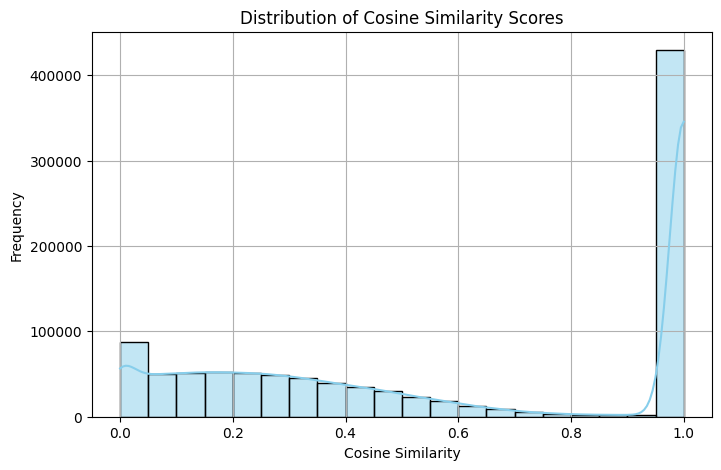

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(new_df['similarity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


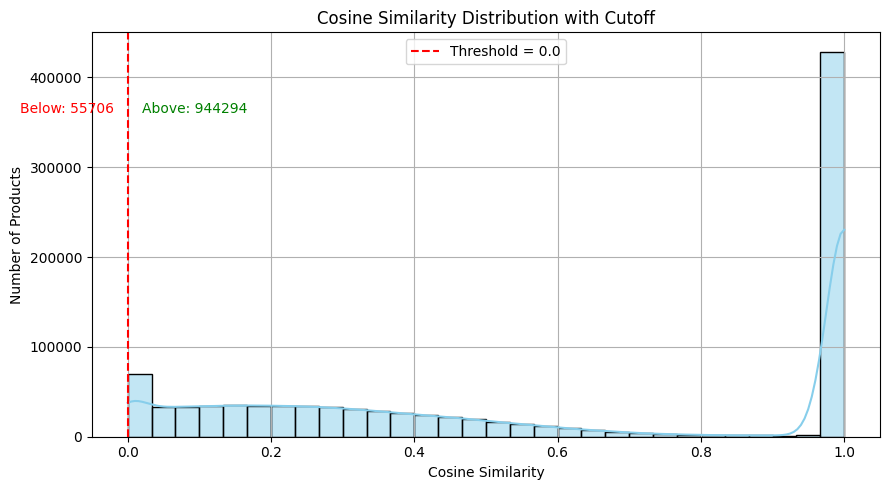

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.00

above_threshold = (new_df['similarity'] > threshold).sum()
below_threshold = (new_df['similarity'] <= threshold).sum()

plt.figure(figsize=(9, 5))
sns.histplot(new_df['similarity'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Cosine Similarity Distribution with Cutoff')
plt.xlabel('Cosine Similarity')
plt.ylabel('Number of Products')
plt.legend()

plt.text(threshold + 0.02, plt.ylim()[1] * 0.8, f'Above: {above_threshold}', color='green')
plt.text(threshold - 0.15, plt.ylim()[1] * 0.8, f'Below: {below_threshold}', color='red')

plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
new_df.loc[new_df['similarity'] == 0.0, 'description'] = new_df.loc[new_df['similarity'] == 0.0, 'product_name']

In [14]:
new_df[new_df["similarity"]==0.00].sort_values(ascending=False, by="similarity").head(50)

,product_name,description,similarity
999981,new 2pcs spotlights headlight 30w motor bike h...,new 2pcs spotlights headlight 30w motor bike h...,0.0
8,douyintrill shaking currency prepaid phone off...,douyintrill shaking currency prepaid phone off...,0.0
10,haidilao hot pot saucesteamboat malabrothtomat...,haidilao hot pot saucesteamboat malabrothtomat...,0.0
32,jisulife 3 in 1 portable fan 9000mah rechargea...,jisulife 3 in 1 portable fan 9000mah rechargea...,0.0
34,alipaycharge and pay on behalf of247,alipaycharge and pay on behalf of247,0.0
50,weight loss slimming belly slimming navel patc...,weight loss slimming belly slimming navel patc...,0.0
62,ready stockstok siapoksigen descaling tablet e...,ready stockstok siapoksigen descaling tablet e...,0.0
72,payment and recharging1charge and pay on behal...,payment and recharging1charge and pay on behal...,0.0
73,cleaners 2in1 multifunctional cleaning brush w...,cleaners 2in1 multifunctional cleaning brush w...,0.0
88,top uppeacekeeper elite androidiosapple247,top uppeacekeeper elite androidiosapple247,0.0


In [15]:
df['product_name'] = new_df['product_name']
df['description'] = new_df['description']

In [18]:
df.head()

,platform_commission_rate,venture_category3_name_en,product_small_img,deeplink,availability,image_url_5,number_of_reviews,is_free_shipping,promotion_price,venture_category2_name_en,current_price,product_medium_img,venture_category1_name_en,brand_name,image_url_4,description,seller_url,product_commission_rate,product_name,sku_id,seller_rating,bonus_commission_rate,business_type,business_area,image_url_2,discount_percentage,seller_name,product_url,product_id,venture_category_name_local,rating_avg_value,product_big_img,image_url_3,price
0,0.07,Parts & Spares,https://my-live.slatic.net/p/98b201dcb23a6f15c...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,None,20.0,True,16.74,Automotive,17.00,https://my-live.slatic.net/p/98b201dcb23a6f15c...,Motors,Perodua,None,myvi viva side bumper clipair panelwiper panel...,https://www.lazada.com.my/shop/z-one-accessori...,0.07,myvi viva side bumper clipair panelwiper panel...,14676226228,99.0,0.00,Lazada,Marketplace,https://my-live.slatic.net/p/c14fc6fdbb240010a...,0.00,Z ONE ACCESSORIES WAREHOUSE SDN BHD,https://www.lazada.com.my/products/myvi-viva-s...,1352896491,Clips,5.000000,https://my-live.slatic.net/p/98b201dcb23a6f15c...,None,17.00
1,0.10,Hair Care,https://my-live.slatic.net/p/90097ebc33ddd0641...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,https://my-live.slatic.net/p/90ffe96b5f53d38cf...,115.0,True,39.90,Personal Care,39.90,https://my-live.slatic.net/p/90097ebc33ddd0641...,Beauty,No Brand,https://my-live.slatic.net/p/4be2f46fee5858ca9...,key benefitsrepairs damaged and compromised ha...,https://www.lazada.com.my/shop/olaplex-haircar...,0.22,buy one get oneolaplex no7 bonding oil 30ml an...,22263928224,96.0,0.12,Lazada,Marketplace,https://my-live.slatic.net/p/8f699d3a2f66b0e45...,73.40,OLAPLEX HAIRCARE Store,https://www.lazada.com.my/products/buy-one-get...,3856537822,Hair Treatments,4.930435,https://my-live.slatic.net/p/90097ebc33ddd0641...,https://my-live.slatic.net/p/140edb5b3b8d13009...,150.00
2,0.07,Electronics,https://my-live.slatic.net/p/35c1806bcb2b6895f...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,https://my-live.slatic.net/p/bd0e9b3b7a0120bdf...,185.0,True,609.00,Automotive,619.00,https://my-live.slatic.net/p/35c1806bcb2b6895f...,Motors,70mai,https://my-live.slatic.net/p/aefad376b4d670f33...,70mai s500 rearview dashcam wide with night vi...,https://www.lazada.com.my/shop/70mai,0.11,70mai s500 rearview dashcam wide with night vi...,4335984780,99.0,0.04,LazMall,Marketplace,https://my-live.slatic.net/p/76442e587a6b97ecf...,15.09,70mai,https://www.lazada.com.my/products/70mai-s500-...,1353246653,On-Dash Video,4.951351,https://my-live.slatic.net/p/35c1806bcb2b6895f...,https://my-live.slatic.net/p/b397560f5f47697dd...,729.00
3,0.07,Disposable Napkins,https://my-live.slatic.net/p/06e24c1ead0e47cb3...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,https://my-live.slatic.net/p/3b635d52337db761f...,33496.0,True,0.00,Disposables,1.06,https://my-live.slatic.net/p/06e24c1ead0e47cb3...,Kitchen & Dining,No Brand,https://my-live.slatic.net/p/b8432e0ce5b55933e...,size50pcsroll the patterns are randomizedthe c...,https://www.lazada.com.my/shop/oiga,0.12,tissues paper disposable cleaning cloths wipe ...,21472602354,98.0,0.05,LazGlobal,Crossborder,https://my-live.slatic.net/p/67e9321adc531ab01...,74.94,OIGA,https://www.lazada.com.my/products/tissues-pap...,3772733731,Disposable Napkins,4.946322,https://my-live.slatic.net/p/06e24c1ead0e47cb3...,https://my-live.slatic.net/p/c03b8685d5e09ed9c...,4.23
4,0.10,Serum & Essence,https://my-live.slatic.net/p/e17a59e38fc2418f8...,lazada://my/d?uri=https://www.lazada.com.my/pr...,True,https://my-live.slatic.net/p/0c7fe68f5a8a9826d...,20378.0,True,1.20,Skin Care,1.20,https://my-live.slatic.net/p/e17a59e38fc2418f8...,Beauty,No Brand,https://my-live.slatic.net/p/17c4711cec6168958...,natural aloe vera gel 300g containing plant es...,https://www.lazada.com.my/shop/youbuy-official,0.15,natural aloe vera gel 300g containing 

In [19]:
df.to_csv('cleaned_data2.csv', index=False)